## Kozai-Lidov cycles

This example sets up a system exhibiting Kozai-Lidov cycles, in which the planet shows oscillation in eccentricity and inclination due to perturbation from a massive body.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

The system has a central star, a planet (here we set it as a test particle) orbiting around it, and a distant, massive third body perturbing the orbit of the planet.
The orbital elements here are adopted from [Katz et al. (2011)](https://arxiv.org/abs/1106.3340). To make this example run faster, we use the WHFast integrator. You might also want to try out the IAS15 integrator by yourself, since with its adaptive timestep the pericenter can be better resolved at high eccentricity at the cost of longer CPU times.

In [2]:
sim = rebound.Simulation()
sim.integrator = "whfast"
sim.ri_whfast.safe_mode = 0
sim.add(m = 1)                                                   # central star
sim.add(a = 1, e = 0.1, inc = 1.39626, Omega = np.pi, omega = 0) # planet
sim.add(m = 1, a = 66.7, e = 0.5)                                # distant perturber
sim.move_to_com()
sim.dt = 2

times = np.linspace(0., 7.7e7, 10000)                            # 400 times secular timescale
incs, eccs, jzs = np.zeros((len(times))), np.zeros((len(times))), np.zeros((len(times)))
ps = sim.particles

We now integrate the system forward in time for $7.7 \times 10^7$ years (if we use AU/solar mass as the length and mass units), or equivalently 400 secular timescales as described in the paper mentioned above. We then plot the results to see the variations in eccentricity and inclination.

In [3]:
for i, t in enumerate(times):
    sim.integrate(t)
    eccs[i] = 1. - ps[1].e
    incs[i] = ps[1].inc
    jzs[i] = np.sqrt(1 - (ps[1].e) ** 2) * np.cos(ps[1].inc)

Text(0.5, 0, '$t/t_{sec}$')

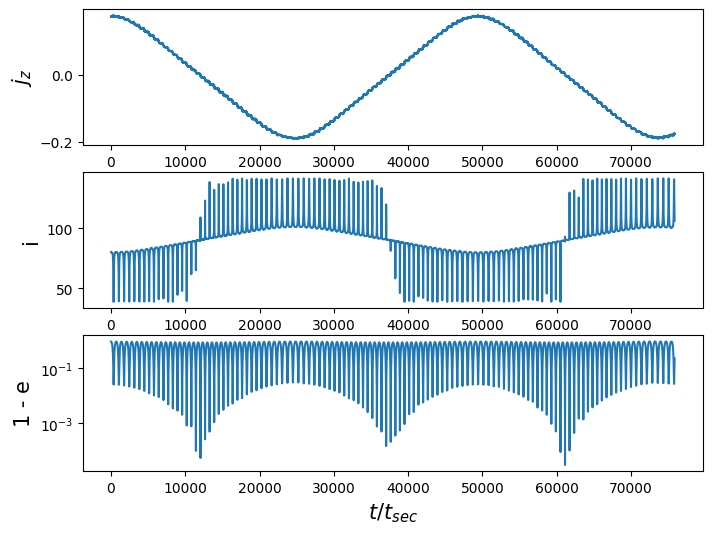

In [4]:
fig, axs = plt.subplots(3, figsize=(8, 6))
axs[0].plot(times / 1015, jzs)
axs[0].set_ylabel("$j_z$", fontsize = 15)
axs[1].plot(times / 1015, incs * 57.2958) # convert radians to degrees
axs[1].set_ylabel("i", fontsize = 15)
axs[2].plot(times / 1015, eccs)
axs[2].set_yscale('log')
axs[2].set_ylabel("1 - e", fontsize = 15)
plt.xlabel("$t/t_{sec}$", fontsize = 15)

The plot roughly matches Figure 2 from [Katz et al. (2011)](https://arxiv.org/abs/1106.3340). While we used REBOUND to simulate this system, Figure 2 in the paper was obtained by solving the time-averaged equations of motion under secular approximation. This indicates a good agreement between N-body simulations and traditional analytical methods, despite some degeneracy between parameters in secular approximation and orbital elements.